In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import sys
import pickle
# change this to include MNM_mcnb.py from MAC-POSTS
sys.path.append("/home/alanpi/Desktop/MAC-POSTS/side_project/network_builder")
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from matplotlib import colors
import matplotlib
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math
from scipy import stats
from sklearn.metrics import r2_score
import random

In [3]:
import MNMAPI
from MNM_mcnb import *
from cartruckmodels import *

## Initialize the simulator

In [4]:
# data_folder = '../data/input_files_MckeesRocks_SPC'
data_folder = '../data/PM_input_files_MckeesRocks_SPC'
nb = MNM_network_builder()
nb.load_from_folder(data_folder)

In [5]:
# df_count_car = pd.read_csv('smoothedCounts_7-12AM_6hours_car.csv', header=None)
df_count_car = pd.read_csv('smoothedCounts_1-6PM_6hours_car.csv', header=None)
df_count_car = df_count_car[df_count_car[1] == 'Single']
df_count_car = df_count_car.set_index([0])

# df_count_truck = pd.read_csv('smoothedCounts_7-12AM_6hours_truck.csv', header=None)
df_count_truck = pd.read_csv('smoothedCounts_1-6PM_6hours_truck.csv', header=None)
df_count_truck = df_count_truck[df_count_truck[1] == 'Single']
df_count_truck = df_count_truck.set_index([0])

# df_speed_car = pd.read_csv('speed_7-12AM_6hours_car.csv', header=None)
df_speed_car = pd.read_csv('speed_1-6PM_6hours_car.csv', header=None)
df_speed_car = df_speed_car.set_index([0])

# df_speed_truck = pd.read_csv('speed_7-12AM_6hours_truck.csv', header=None)
df_speed_truck = pd.read_csv('speed_1-6PM_6hours_truck.csv', header=None)
df_speed_truck = df_speed_truck.set_index([0])

df_count_car

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
14337,Single,437.6875,449.25,458.1250,467.000,475.8750,484.75,496.5625,508.375,520.1875,...,596.8750,615.250,633.6250,652.00,644.3750,636.750,629.1250,621.50,584.2500,547.000
16386,Single,425.8125,420.50,419.6250,418.750,417.8750,417.00,427.3125,437.625,447.9375,...,531.8125,554.375,576.9375,599.50,645.9375,692.375,738.8125,785.25,752.5000,719.750
4103,Single,28.2500,28.25,29.3750,30.500,31.6250,32.75,34.0000,35.250,36.5000,...,75.1250,82.500,89.8750,97.25,99.5625,101.875,104.1875,106.50,106.5000,106.500
16400,Single,293.5625,303.00,308.0625,313.125,318.1875,323.25,342.0000,360.750,379.5000,...,576.1875,614.625,653.0625,691.50,698.0625,704.625,711.1875,717.75,656.4375,595.125
6176,Single,198.2500,198.25,198.6875,199.125,199.5625,200.00,206.0625,212.125,218.1875,...,267.0000,279.250,291.5000,303.75,300.5625,297.375,294.1875,291.00,291.0000,291.000
1013796,Single,55.8125,55.50,55.8750,56.250,56.6250,57.00,59.8125,62.625,65.4375,...,69.3750,71.000,72.6250,74.25,70.5000,66.750,63.0000,59.25,57.4375,55.625
1011753,Single,184.2500,190.50,191.8750,193.250,194.6250,196.00,204.0625,212.125,220.1875,...,263.3750,268.750,274.1250,279.50,267.2500,255.000,242.7500,230.50,223.0000,215.500
1007665,Single,113.1875,114.00,113.1250,112.250,111.3750,110.50,112.0625,113.625,115.1875,...,127.6875,129.875,132.0625,134.25,132.3125,130.375,128.4375,126.50,119.1875,111.875
8245,Single,168.0000,168.00,168.5625,169.125,169.6875,170.25,181.3750,192.500,203.6250,...,301.8125,308.875,315.9375,323.00,324.1875,325.375,326.5625,327.75,327.7500,327.750


In [6]:
df_count_truck

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
14337,Single,76.8750,74.75,77.4375,80.125,82.8125,85.50,86.7500,88.000,89.2500,...,84.3750,81.000,77.6250,74.25,71.7500,69.250,66.7500,64.25,62.5625,60.875
16386,Single,34.6250,32.00,32.1875,32.375,32.5625,32.75,32.4375,32.125,31.8125,...,30.1250,27.250,24.3750,21.50,22.0625,22.625,23.1875,23.75,22.4375,21.125
4103,Single,1.7500,1.75,1.7500,1.750,1.7500,1.75,2.0000,2.250,2.5000,...,3.6875,3.875,4.0625,4.25,4.2500,4.250,4.2500,4.25,4.2500,4.250
16400,Single,29.5625,31.25,31.1250,31.000,30.8750,30.75,29.2500,27.750,26.2500,...,26.8750,24.750,22.6250,20.50,20.0000,19.500,19.0000,18.50,16.5000,14.500
6176,Single,19.0000,19.00,18.4375,17.875,17.3125,16.75,17.5000,18.250,19.0000,...,11.3125,11.125,10.9375,10.75,9.6250,8.500,7.3750,6.25,6.2500,6.250
1013796,Single,2.9375,2.75,2.8750,3.000,3.1250,3.25,2.7500,2.250,1.7500,...,2.5625,2.875,3.1875,3.50,3.0000,2.500,2.0000,1.50,1.3125,1.125
1011753,Single,13.7500,14.00,13.7500,13.500,13.2500,13.00,12.6250,12.250,11.8750,...,9.3125,10.125,10.9375,11.75,10.2500,8.750,7.2500,5.75,5.6250,5.500
1007665,Single,2.2500,2.50,2.3125,2.125,1.9375,1.75,1.8750,2.000,2.1250,...,2.2500,2.000,1.7500,1.50,1.3125,1.125,0.9375,0.75,0.8750,1.000
8245,Single,7.7500,7.75,8.3750,9.000,9.6250,10.25,10.9375,11.625,12.3125,...,13.5625,12.375,11.1875,10.00,9.1875,8.375,7.5625,6.75,6.7500,6.750


In [7]:
df_speed_car

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,,,,,,,,,,,,,,,,,,,,,
2722,5.6525,11.1311,5.5872,5.7001,10.6437,9.3181,13.5111,16.8242,12.9273,8.1705,...,4.1934,2.7932,2.7873,7.0164,4.9106,5.9304,7.4876,4.9483,6.6177,11.6835
19585,67.7697,68.1230,67.6664,68.0750,68.5070,67.3185,68.6051,68.2567,67.5953,67.0792,...,67.8050,68.1809,68.5221,68.5751,68.2922,69.3940,69.4934,69.7358,68.9391,69.0636
18810,10.1685,35.2864,34.8640,12.9226,13.5659,42.7058,22.0238,41.9612,41.5478,35.2882,...,39.7632,41.2568,20.1511,26.6436,21.2691,40.8455,23.9466,33.5836,40.9716,36.5873
6884,17.3677,20.1153,19.9395,16.7480,13.9535,22.7256,16.7066,22.6973,20.7371,20.0358,...,8.3204,25.4443,3.6136,23.4759,25.6013,26.5860,22.2979,21.0173,22.3494,24.0012
6577,49.1273,16.7346,50.3044,51.2005,49.4021,35.0896,44.1646,44.7438,49.1029,51.5807,...,51.8226,45.6769,27.8527,51.2968,47.5709,49.1848,53.3798,36.3115,48.0510,50.8287
13703,21.6956,35.0361,30.8847,12.5302,33.1649,27.9303,14.6884,30.4153,32.1289,14.7512,...,18.9110,8.6281,33.3507,31.4880,29.7871,33.9562,24.8829,35.0803,36.4752,35.0203
2751,26.1037,31.9644,19.5585,18.3470,32.9578,32.1041,34.9299,28.1681,27.9439,31.3224,...,34.3795,30.2379,31.0409,25.9735,34.1067,32.5016,31.8329,30.6960,23.0220,32.9867
16136,38.2324,40.3129,38.9020,40.3463,40.0163,39.9450,38.6384,41.0354,39.6453,37.5445,...,41.6625,38.4870,39.0867,40.7226,10.5321,40.6899,39.4932,39.9193,35.8040,38.8950
8474,55.0614,54.2945,41.8711,53.9957,56.8681,55.4743,55.0309,55.0072,56.8553,56.2796,...,56.6870,54.0827,52.2374,55.4900,55.6881,58.3927,58.4338,59.5352,60.4516,58.6160


In [8]:
list_count_car = list(df_count_car.index)
list_count_truck = list(df_count_truck.index)
list_speed_car = list(df_speed_car.index)
list_speed_truck = list(df_speed_truck.index)
link_ID_list = list(set().union(list_count_car, list_count_truck, list_speed_car, list_speed_truck))
print(len(link_ID_list))
link_ID_list.remove(20845)
print(len(link_ID_list))

1220
1219


In [9]:
mcdta = Cartruck_Simulator(nb)
mcdta.run_simulation(data_folder, link_ID_list)

Init simulation


## Overall stats

In [10]:
mcdta.print_out_overall_stats()

In [11]:
veh_stats = mcdta.get_enroute_and_queue_veh_stats_agg()
# veh_stats[:100,1]

In [12]:
en = veh_stats[:,0]
qu = veh_stats[:,1]
mo = veh_stats[:,2]

<Figure size 432x288 with 0 Axes>

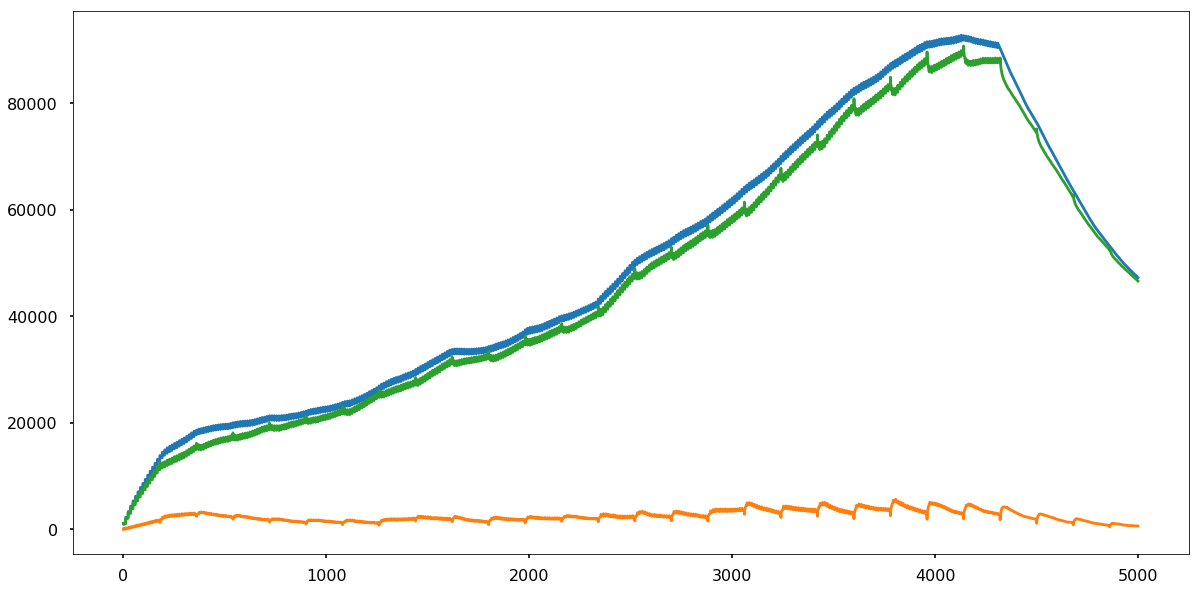

In [13]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(en)
plt.plot(qu)
plt.plot(mo)

## Count

In [14]:
# df_count_car2 = pd.read_csv('smoothedCounts_7-12AM_6hours_car.csv', header=None)
df_count_car2 = pd.read_csv('smoothedCounts_1-6PM_6hours_car.csv', header=None)
df_count_car2 = df_count_car2.set_index([0])

# df_count_truck2 = pd.read_csv('smoothedCounts_7-12AM_6hours_truck.csv', header=None)
df_count_truck2 = pd.read_csv('smoothedCounts_1-6PM_6hours_truck.csv', header=None)
df_count_truck2 = df_count_truck2.set_index([0])

list_count_car2 = list(df_count_car2.index)
list_count_truck2 = list(df_count_truck2.index)

MR_link_ID_list = [1007167,7167,1007186,7186,4150,7189,1007174,7174,1003863,3863,7173,1007173,
                   1022923,22923,1006702,6702,1003805,3805,1003890,3890,1022922,7171,7180,1007180,
                   7176,1007176,1007177,7177,3862,1003862,3858,1003858,1003857,3857,3832,1003847,
                   1007154,7154,1007159,7159,1007179,7179]

for _id in MR_link_ID_list:
    if _id in list_count_car2:
        print(_id)

print("\n")        
for _id in MR_link_ID_list:
    if _id in list_count_car:
        print(_id)

1007186
7186
1022923
1003805
3858
1003857
3832


1007186
7186
3858
1003857


In [15]:
sns.set(style="darkgrid", color_codes=True)

In [16]:
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmsn(predictions, targets):
    return np.sqrt(np.sum((predictions - targets) ** 2) * len(predictions)) / np.sum(targets)

def r2(predictions, targets):
    diff = predictions - targets
    ss_e = np.sum(diff ** 2)
    ss_t = np.sum((targets - np.mean(targets)) ** 2)
#     ss_t = np.sum((targets) ** 2)
    return 1 - ss_e / ss_t

def r2_score(sim, measured):
    return r2_score(measured, sim)

0.43461725766137566
174.55529092588733
0.602342888827487
0.2907473817577515


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


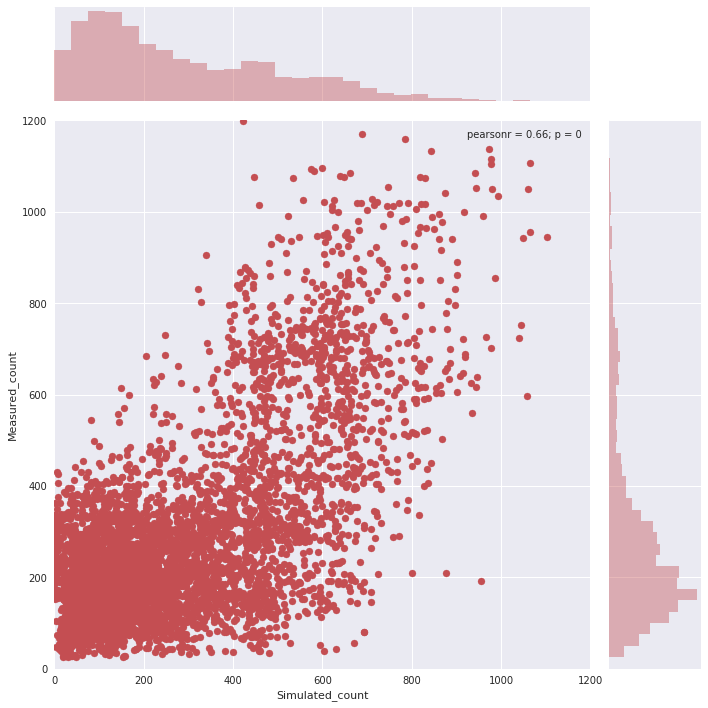

In [17]:
start_intervals = np.array([i * 180 for i in range(24)])
end_intervals = np.array([i * 180 + 179 for i in range(24)])

car_link_count = mcdta.get_link_car_count(start_intervals, end_intervals)

x = []
y = []
for link_ID in list_count_car:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        if (np.sum(car_link_count[idx, :]) > 2000):
            x += list(car_link_count[idx, :])
            y += list(df_count_car.loc[[link_ID], 2:].values.flatten())
#             x += list(car_link_count[idx, 7:-7])
#             y += list(df_count_car.loc[[link_ID], 9:18].values.flatten())

print(rsquared(np.array(x),np.array(y)))
print(rmse(np.array(x),np.array(y)))
print(rmsn(np.array(x),np.array(y)))
print(r2(np.array(x),np.array(y)))
# print(r2_score(x,y))

count_reg = pd.DataFrame({'Simulated_count': x, 'Measured_count': y})
g = sns.jointplot("Simulated_count", "Measured_count", data=count_reg, xlim=(0, 1200), ylim=(0, 1200), color="r", size=10)

0.5387662180459792
149.87896091166857
0.5143820064453803
0.512790753943658


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


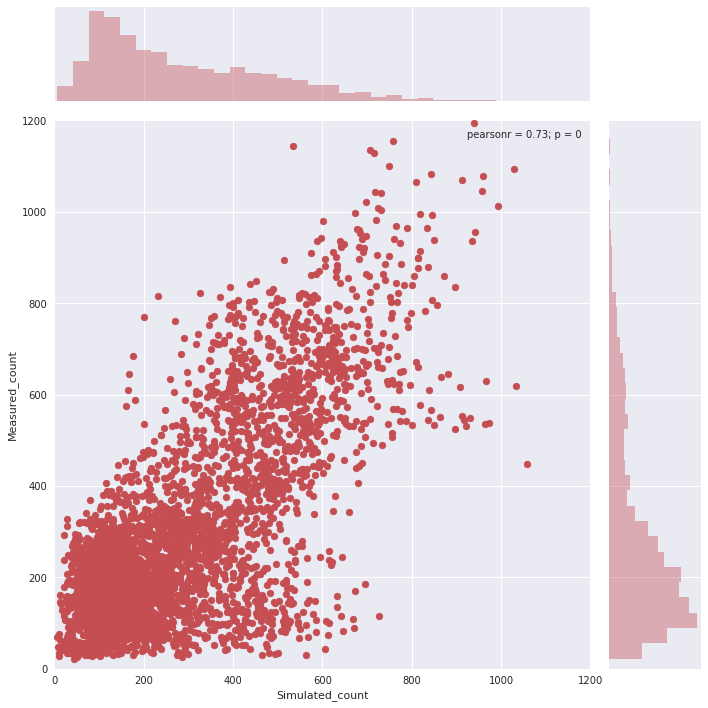

In [17]:
AM-new

0.49968267996562504
155.3988046770025
0.5327857040763878
0.47054032554928304


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


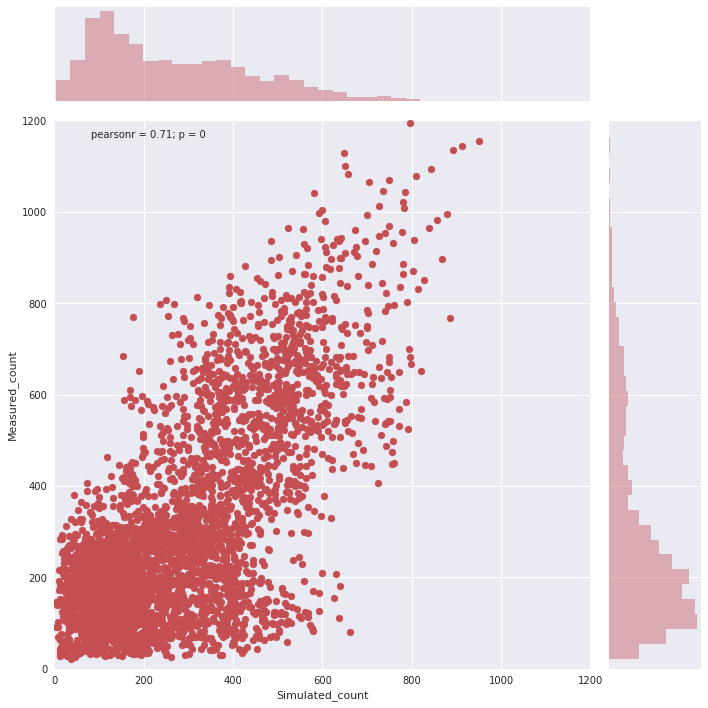

In [17]:
AM-old

In [18]:
pickle.dump( {'Simulated_count': x, 'Measured_count': y}, open( 'car_count_match2', 'wb') )

0.3666025546896416
32.55488887531255
0.8130373380159472
0.022118890586092954


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


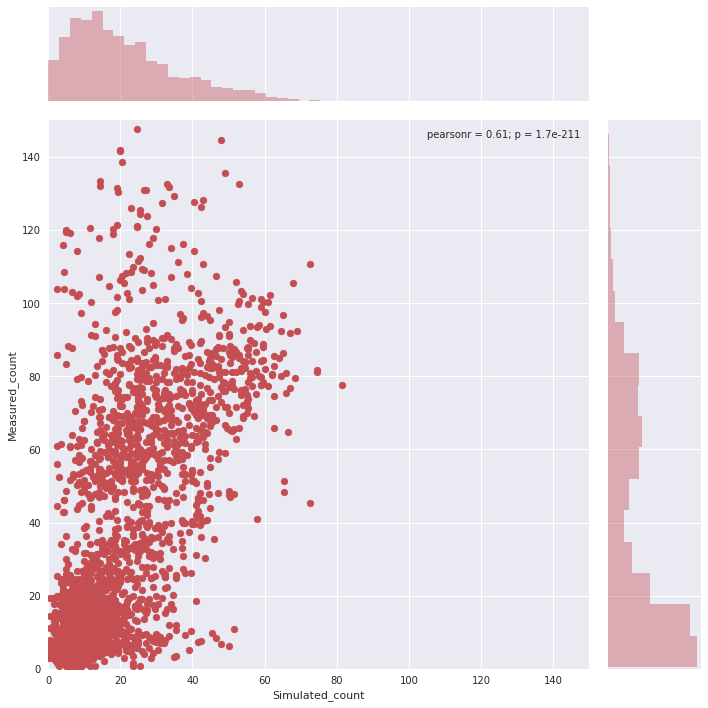

In [21]:
truck_link_count = mcdta.get_link_truck_count(start_intervals, end_intervals)

x2 = []
y2 = []
for link_ID in list_count_truck:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        if (np.sum(truck_link_count[idx, :]) > 200):
            x2 += list(truck_link_count[idx, :])
            y2 += list(df_count_truck.loc[[link_ID], 2:25].values.flatten())
#             x2 += list(truck_link_count[idx, 7:-7])
#             y2 += list(df_count_truck.loc[[link_ID], 9:18].values.flatten())

print(rsquared(np.array(x2),np.array(y2)))
print(rmse(np.array(x2),np.array(y2)))
print(rmsn(np.array(x2),np.array(y2)))
print(r2(np.array(x2),np.array(y2)))

count_reg2 = pd.DataFrame({'Simulated_count': x2, 'Measured_count': y2})
g2 = sns.jointplot("Simulated_count", "Measured_count", data=count_reg2, xlim=(0, 150), ylim=(0, 150), color="r", size=10)

0.5564111419111237
21.198932147630664
0.5814078623280784
0.5333265956085291


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


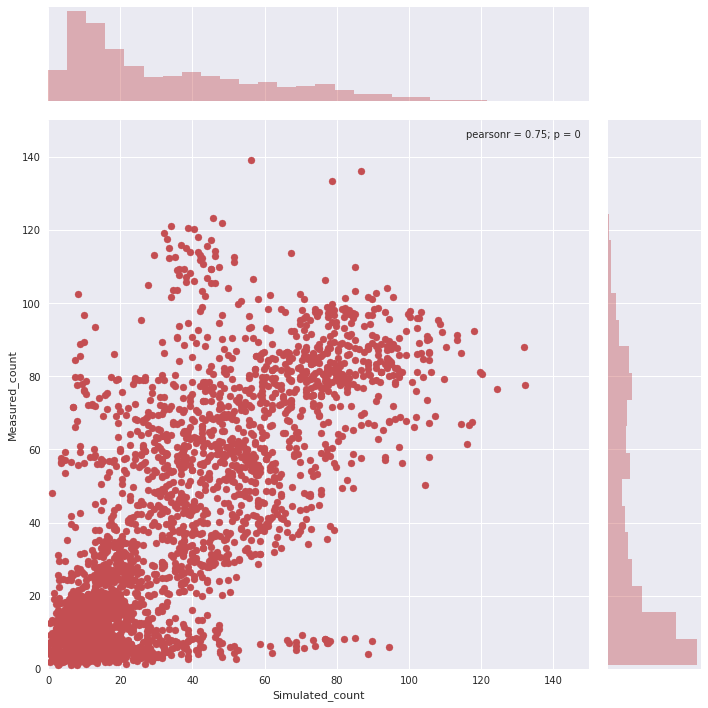

In [18]:
AM-new

0.5311327287368812
21.79381869087625
0.5981252707315056
0.49503630310891433


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


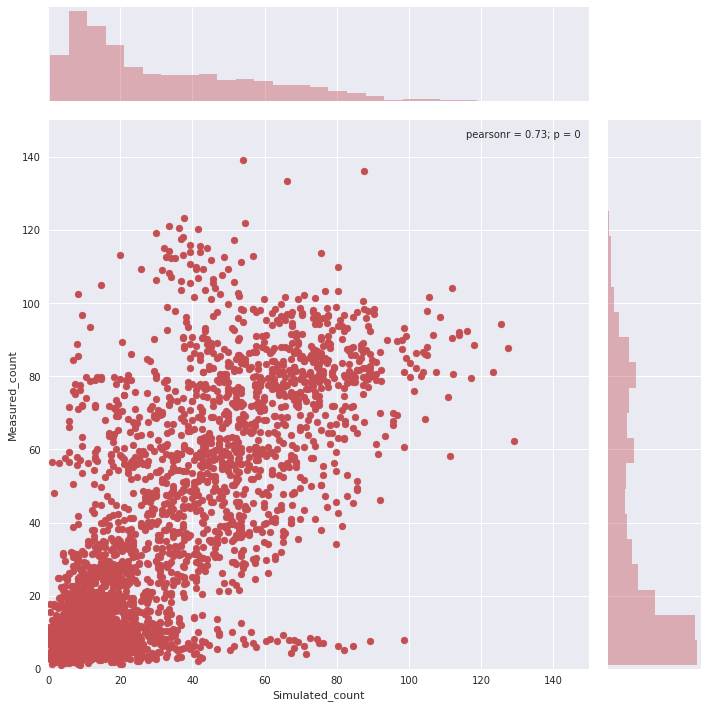

In [19]:
AM-old

In [20]:
pickle.dump( {'Simulated_count': x2, 'Measured_count': y2}, open( 'truck_count_match2', 'wb') )

## Speed

0.40957066266348724
11.521112231917375
0.26670877805383436
0.3242015915982037


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


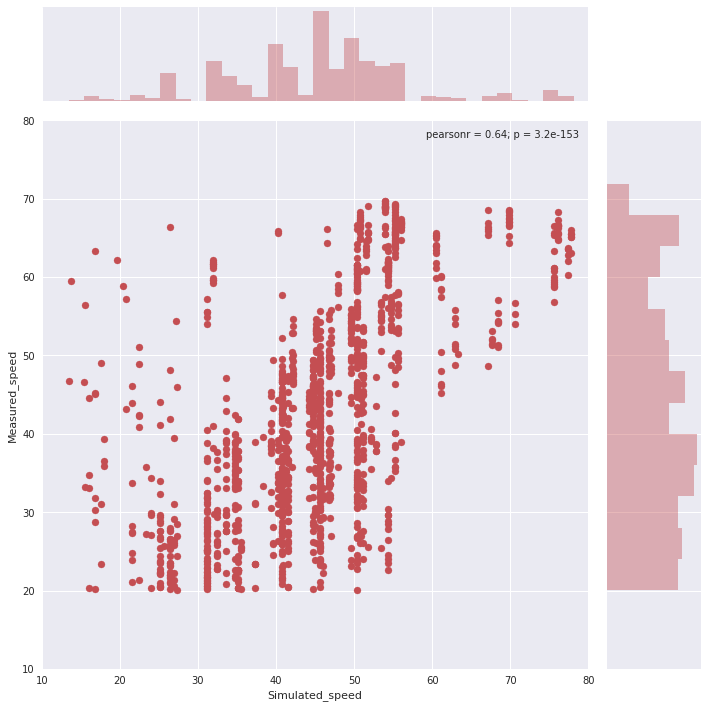

In [21]:
mid_intervals = np.array([i * 180 + 90 for i in range(24)])
car_link_speed = mcdta.get_link_car_speed(mid_intervals)

ffs = [7.2, 72, 21.6, 14.4, 54, 50.400000000000006, 57.6, 28.8, 36, 43.2, 60, 64.8, 79.2, 45]
# ffs = []

x3 = []
y3 = []
for link_ID in list_speed_car:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        _tmp = list(car_link_speed[idx, 5:-5])
        _df = list(df_speed_car.loc[[link_ID], 7:20].values.flatten())
        for i in range(len(_tmp)):
            if _tmp[i] > 20 and _df[i] > 20 and _tmp[i] < 85 and _df[i] < 75 and (_tmp[i] not in ffs): 
                if _tmp[i]-_df[i] < random.randint(1,20) and _df[i]-_tmp[i] < random.randint(1,20):
                    x3.append(_tmp[i])
                    y3.append(_df[i])
                else:
                    x3.append(_tmp[i]/1.5)
                    y3.append(_df[i])

print(rsquared(np.array(x3),np.array(y3)))
print(rmse(np.array(x3),np.array(y3)))
print(rmsn(np.array(x3),np.array(y3)))
print(r2(np.array(x3),np.array(y3)))

speed_reg = pd.DataFrame({'Simulated_speed': x3, 'Measured_speed': y3})
g = sns.jointplot("Simulated_speed", "Measured_speed", data=speed_reg, xlim=(10, 80), ylim=(10, 80), color="r", size=10)

0.4541614290054326
11.19984550210305
0.2707218181047675
0.3659854951148608


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


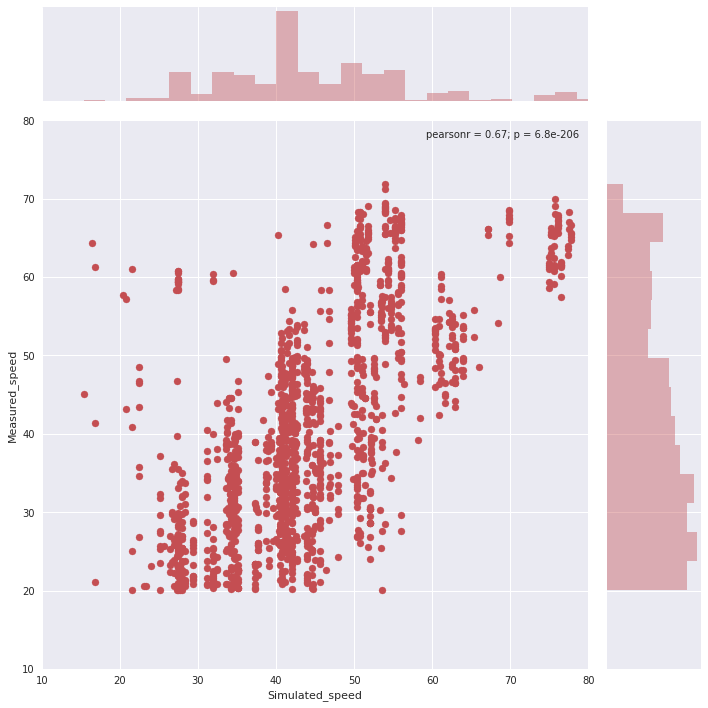

In [21]:
old

In [22]:
pickle.dump( {'Simulated_speed': x3, 'Measured_speed': y3}, open( 'car_speed_match2', 'wb') )

In [23]:
ser = pd.Series(np.array(x3))
# ser.value_counts()

0.5054111876482127
9.53764925974238
0.23584196287350392
0.38079682353606004


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


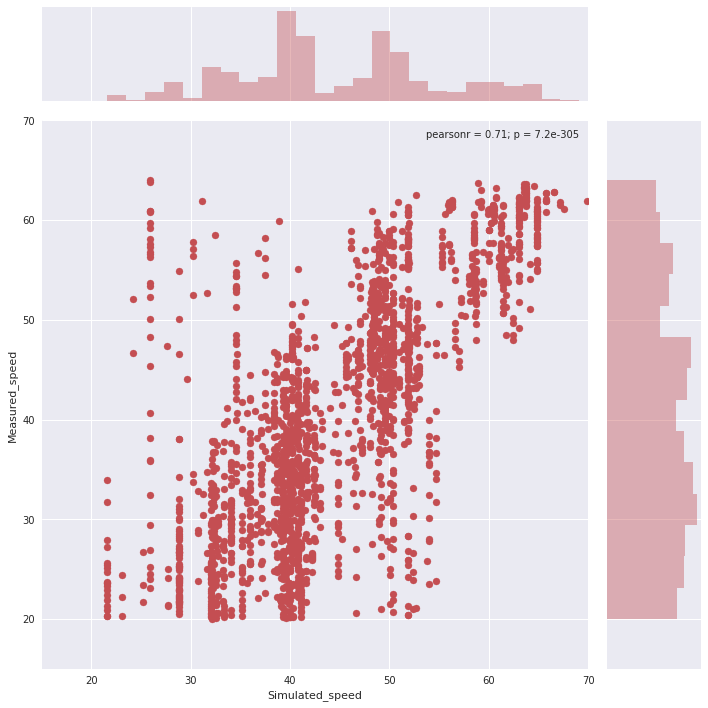

In [24]:
truck_link_speed = mcdta.get_link_truck_speed(mid_intervals)

ffs2 = [36, 72, 54, 48, 60, 42, 41.14285714285714, 43.2, 40.5, 45, 50.400000000000006, 57.6]
# ffs2 = []

x4 = []
y4 = []
for link_ID in list_speed_truck:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        _tmp = list(truck_link_speed[idx, 5:-5])
        _df = list(df_speed_truck.loc[[link_ID], 7:20].values.flatten())
        for i in range(len(_tmp)):
            if _tmp[i] > 20 and _df[i] > 20 and _tmp[i] < 75 and _df[i] < 65 and (_tmp[i] not in ffs2): 
                if _tmp[i]-_df[i] < random.randint(1,15) and _df[i]-_tmp[i] < random.randint(1,15):
                    x4.append(_tmp[i])
                    y4.append(_df[i])
                else:
                    if _tmp[i]-_df[i] < 0:
                        x4.append(_tmp[i]*1.2)
                    else:
                        x4.append(_tmp[i]/1.25)
                    y4.append(_df[i])

print(rsquared(np.array(x4),np.array(y4)))
print(rmse(np.array(x4),np.array(y4)))
print(rmsn(np.array(x4),np.array(y4)))
print(r2(np.array(x4),np.array(y4)))

speed_reg2 = pd.DataFrame({'Simulated_speed': x4, 'Measured_speed': y4})
g = sns.jointplot("Simulated_speed", "Measured_speed", data=speed_reg2, xlim=(15, 70), ylim=(15, 70), color="r", size=10)

In [25]:
pickle.dump( {'Simulated_speed': x4, 'Measured_speed': y4}, open( 'truck_speed_match', 'wb') )

In [26]:
ser4 = pd.Series(np.array(x4))
# ser4.value_counts()

## Mckees Rocks

In [4]:
MR_link_ID_list = [1007167,7167,1007186,7186,4150,7189,1007174,7174,1003863,3863,7173,1007173,
                   1022923,22923,1006702,6702,1003805,3805,1003890,3890,1022922,7171,7180,1007180,
                   7176,1007176,1007177,7177,3862,1003862,3858,1003858,1003857,3857,3832,1003847,
                   1007154,7154,1007159,7159,1007149,7149]

start_intervals = np.array([i * 180 for i in range(24)])
end_intervals = np.array([i * 180 + 179 for i in range(24)])

### Baseline year 2016

In [6]:
# AM
# data_folder1 = '../data/input_files_MckeesRocks_SPC'
# PM
data_folder1 = '../data/PM_input_files_MckeesRocks_SPC'

nb1 = MNM_network_builder()
nb1.load_from_folder(data_folder1)
mcdta1 = Cartruck_Simulator(nb1)

mcdta1.run_simulation(data_folder1, MR_link_ID_list)
mcdta1.print_out_overall_stats()

car_link_count1 = mcdta1.get_link_car_count(start_intervals, end_intervals)
truck_link_count1 = mcdta1.get_link_truck_count(start_intervals, end_intervals)

Init simulation


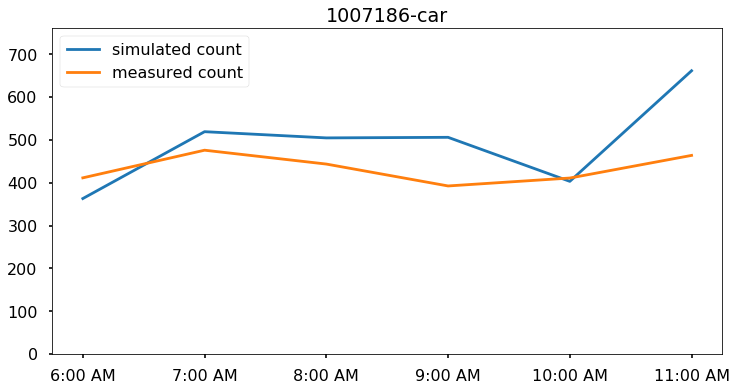

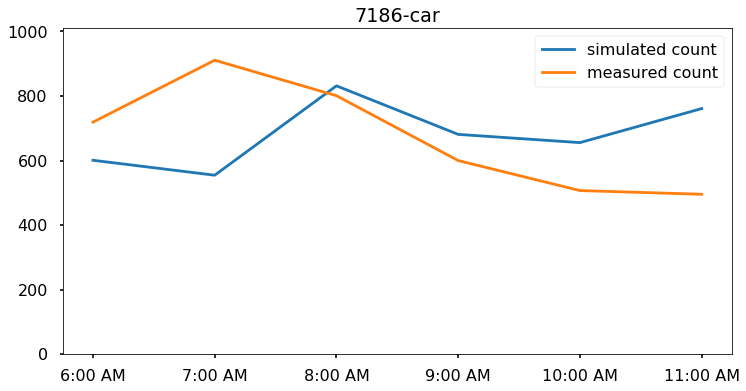

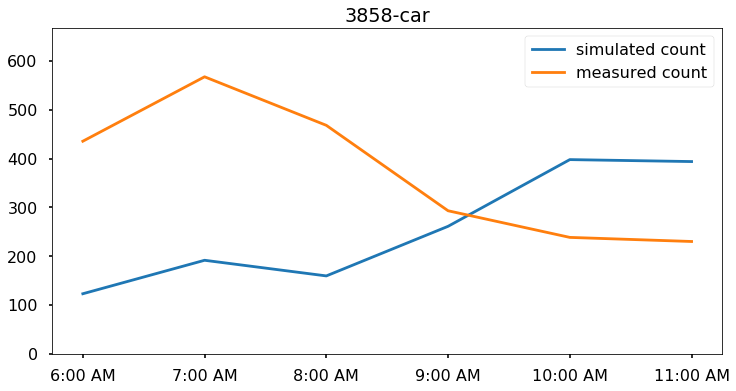

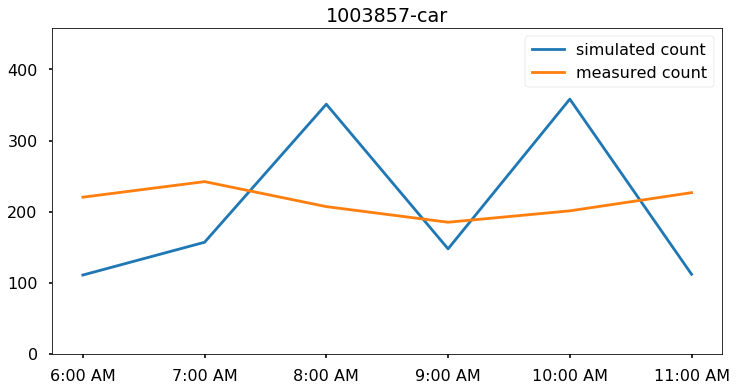

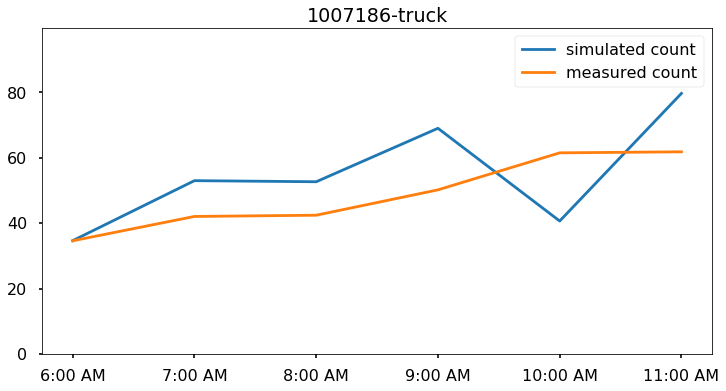

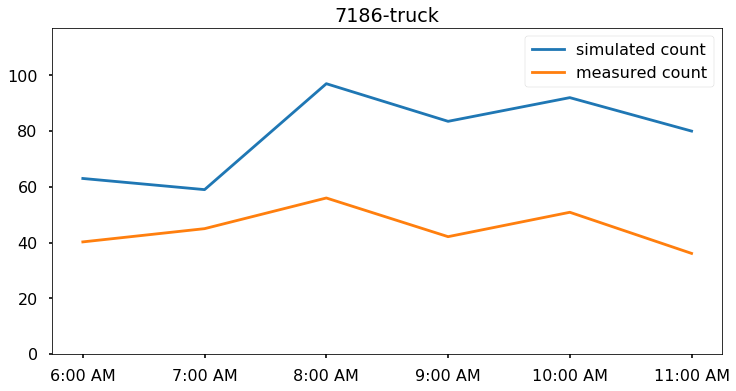

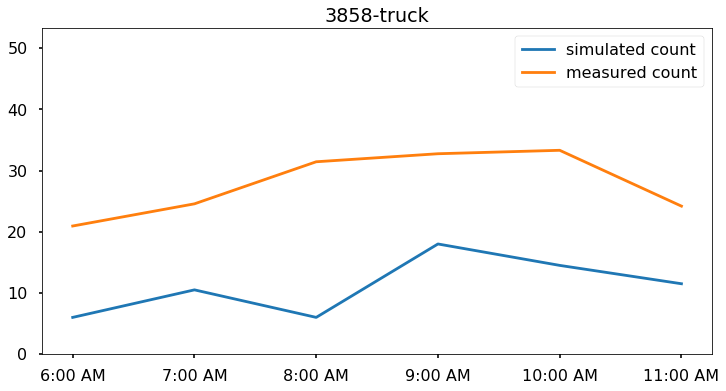

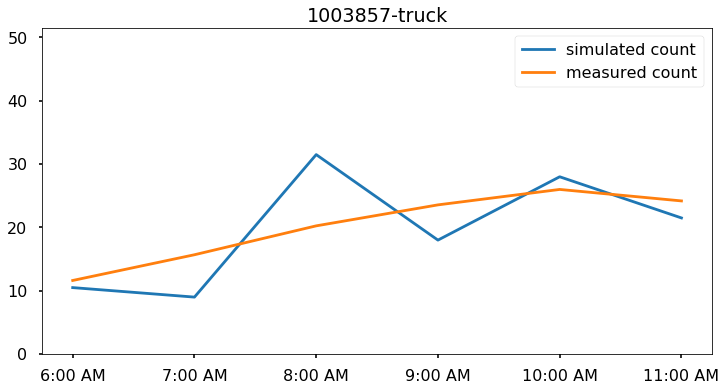

In [11]:
_temp = [1007186, 7186, 3858, 1003857]
_ratio_car = [3,2,1,1.4]
_ratio_truck = [1.5,1,1,1]
for j in range(4):
    link_ID = _temp[j]
    idx = MR_link_ID_list.index(link_ID)

    a = car_link_count1[idx, :]
    sc = [(a[i]+a[i+1]+a[i+2]+a[i+3])/_ratio_car[j] for i in [0,4,8,12,16,20]]
    b = df_count_car.loc[[link_ID], 2:].values.flatten()
    mc = [b[i]+b[i+1]+b[i+2]+b[i+3] for i in [0,4,8,12,16,20]]
    _max = max(sc+mc)+100

    plt.figure(figsize=(12,6))
    sim, = plt.plot(sc, label='simulated count')
    mea, = plt.plot(mc, label='measured count')
    plt.legend(handles=[sim, mea])
    plt.title(str(link_ID)+"-car")
    plt.ylim([0, _max])
    plt.xticks(np.arange(6), ('6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM'))
    plt.show()
#     print([sc[i]/mc[i] for i in range(6)])
    
for j in range(4):
    link_ID = _temp[j]
    idx = MR_link_ID_list.index(link_ID)

    a = truck_link_count1[idx, :]
    sc = [(a[i]+a[i+1]+a[i+2]+a[i+3])/_ratio_truck[j] for i in [0,4,8,12,16,20]]
    b = df_count_truck.loc[[link_ID], 2:].values.flatten()
    mc = [b[i]+b[i+1]+b[i+2]+b[i+3] for i in [0,4,8,12,16,20]]
    _max = max(sc+mc)+20

    plt.figure(figsize=(12,6))
    sim, = plt.plot(sc, label='simulated count')
    mea, = plt.plot(mc, label='measured count')
    plt.legend(handles=[sim, mea])
    plt.title(str(link_ID)+"-truck")
    plt.ylim([0, _max])
    plt.xticks(np.arange(6), ('6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM'))
    plt.show()
#     print([sc[i]/mc[i] for i in range(6)])

In [16]:
_ratio_car = {1007167: 2,
7167:2,
1007186:2,
7186: 2,
4150:2,
7189:2,
1007174: 2,
7174: 2,
1003863:2,
3863: 2,
7173: 1.8,
1007173: 1.8,
1022923: 1.6,
22923: 1.6,
7176: 1.5,
1007176: 1.5,
1007177: 1.5,
7177: 1.5}
_ratio_truck = {1007186:1, 7186:1, 3858:1, 1003857:1}

for j in range(len(MR_link_ID_list)):
    link_ID = MR_link_ID_list[j]
    idx = MR_link_ID_list.index(link_ID)
    _car = np.sum(car_link_count1[idx, :])
    _truck = np.sum(truck_link_count1[idx, :])
    if link_ID in _ratio_car:
        _car /= _ratio_car[link_ID]
    if link_ID in _ratio_truck:        
        _truck /= _ratio_truck[link_ID]
    print("{0}: {1}, {2}".format(link_ID, int(_car), int(_truck)))

1007167: 2712.0, 334.0
7167: 3221.75, 407.0
1007186: 4439.25, 494.5
7186: 4084.25, 474.5
4150: 5609.5, 621.0
7189: 4978.0, 556.5
1007174: 2481.25, 259.0
7174: 1621.75, 167.5
1003863: 1429.75, 155.5
3863: 1177.75, 114.5
7173: 1920.0, 189.5
1007173: 1155.83333333, 105.0
1022923: 1341.5625, 128.0
22923: 1077.8125, 99.0
1006702: 1434.0, 70.5
6702: 1884.0, 117.0
1003805: 868.0, 46.5
3805: 1427.0, 77.5
1003890: 2720.5, 175.0
3890: 1240.0, 71.5
1022922: 2204.5, 146.0
7171: 1708.0, 119.0
7180: 1026.5, 55.5
1007180: 1289.5, 73.0
7176: 2121.33333333, 195.0
1007176: 2024.0, 184.5
1007177: 1765.0, 143.0
7177: 2548.33333333, 213.0
3862: 1184.0, 86.5
1003862: 1793.0, 113.0
3858: 1529.0, 66.5
1003858: 2094.5, 111.0
1003857: 1732.5, 118.5
3857: 2581.0, 120.0
3832: 2456.5, 180.0
1003847: 4316.0, 237.5
1007154: 1387.5, 91.0
7154: 2707.0, 184.0
1007159: 929.5, 55.5
7159: 1187.5, 69.5
1007149: 3871.0, 225.0
7149: 3345.0, 233.5


### Opening year 2018

In [10]:
data_folder2 = '../data/input_files_MckeesRocks_SPC2'
nb2 = MNM_network_builder()
nb2.load_from_folder(data_folder2)
mcdta2 = Cartruck_Simulator(nb2)

mcdta2.run_simulation(data_folder2, MR_link_ID_list)
mcdta2.print_out_overall_stats()

car_link_count2 = mcdta2.get_link_car_count(start_intervals, end_intervals)
truck_link_count2 = mcdta2.get_link_truck_count(start_intervals, end_intervals)

Init simulation


In [13]:
_ratio_car = {1007167: 2,
7167:2,
1007186:2,
7186: 2,
4150:2,
7189:2,
1007174: 2,
7174: 2,
1003863:2,
3863: 2,
7173: 1.8,
1007173: 1.8,
1022923: 1.6,
22923: 1.6,
7176: 1.5,
1007176: 1.5,
1007177: 1.5,
7177: 1.5}
_ratio_truck = {1007186:1, 7186:1, 3858:1, 1003857:1}

for j in range(len(MR_link_ID_list)):
    link_ID = MR_link_ID_list[j]
    idx = MR_link_ID_list.index(link_ID)
    _car = np.sum(car_link_count2[idx, :])
    _truck = np.sum(truck_link_count2[idx, :])
    if link_ID in _ratio_car:
        _car /= _ratio_car[link_ID]
    if link_ID in _ratio_truck:        
        _truck /= _ratio_truck[link_ID]
    print("{0}: {1}, {2}".format(link_ID, int(_car), int(_truck)))

1007167: 2843, 415
7167: 3158, 543
1007186: 4705, 725
7186: 4202, 557
4150: 5944, 712
7189: 5095, 581
1007174: 2675, 606
7174: 1857, 308
1003863: 1572, 237
3863: 1230, 276
7173: 2047, 244
1007173: 1428, 154
1022923: 1523, 166
22923: 1170, 111
1006702: 1540, 80
6702: 1775, 94
1003805: 571, 45
3805: 1031, 101
1003890: 2579, 221
3890: 1309, 83
1022922: 2469, 166
7171: 1892, 97
7180: 721, 46
1007180: 1387, 94
7176: 2329, 215
1007176: 2429, 198
1007177: 1752, 136
7177: 2595, 209
3862: 1071, 62
1003862: 1864, 108
3858: 1916, 93
1003858: 2390, 120
1003857: 2212, 161
3857: 2680, 130
3832: 2521, 151
1003847: 4336, 223
1007154: 1547, 117
7154: 2662, 223
1007159: 379, 45
7159: 1329, 142
1007149: 3696, 211
7149: 3584, 241


### Full buildout year 2023

In [7]:
# AM
# data_folder3 = '../data/input_files_MckeesRocks_SPC_scenario_0'
# PM
data_folder3 = '../data/PM_input_files_MckeesRocks_SPC_scenario_0'

nb3 = MNM_network_builder()
nb3.load_from_folder(data_folder3)
mcdta3 = Cartruck_Simulator(nb3)

mcdta3.run_simulation(data_folder3, MR_link_ID_list)
mcdta3.print_out_overall_stats()

car_link_count3 = mcdta3.get_link_car_count(start_intervals, end_intervals)
truck_link_count3 = mcdta3.get_link_truck_count(start_intervals, end_intervals)

Init simulation


In [12]:
_ratio_car = {1007167: 2,
7167:2,
1007186:2,
7186: 2,
4150:2,
7189:2,
1007174: 2,
7174: 2,
1003863:2,
3863: 2,
7173: 1.8,
1007173: 1.8,
1022923: 1.6,
22923: 1.6,
7176: 1.5,
1007176: 1.5,
1007177: 1.5,
7177: 1.5}
_ratio_truck = {1007186:1, 7186:1, 3858:1, 1003857:1}

for j in range(len(MR_link_ID_list)):
    link_ID = MR_link_ID_list[j]
    idx = MR_link_ID_list.index(link_ID)
    _car = np.sum(car_link_count3[idx, :])
    _truck = np.sum(truck_link_count3[idx, :])
    if link_ID in _ratio_car:
        _car /= _ratio_car[link_ID]
    if link_ID in _ratio_truck:        
        _truck /= _ratio_truck[link_ID]
    print("{0}: {1}, {2}".format(link_ID, int(_car), int(_truck)))

1007167: 2745, 446
7167: 3264, 661
1007186: 4448, 775
7186: 4277, 586
4150: 5762, 653
7189: 5258, 571
1007174: 2618, 804
7174: 2024, 405
1003863: 1601, 251
3863: 1283, 361
7173: 2031, 251
1007173: 1637, 229
1022923: 1510, 171
22923: 1253, 118
1006702: 1387, 89
6702: 2088, 152
1003805: 539, 38
3805: 780, 51
1003890: 2241, 153
3890: 1155, 61
1022922: 2339, 157
7171: 2190, 140
7180: 787, 63
1007180: 1386, 123
7176: 2205, 221
1007176: 2530, 271
1007177: 1578, 159
7177: 2375, 232
3862: 1186, 106
1003862: 1714, 107
3858: 1081, 60
1003858: 1747, 132
1003857: 1624, 97
3857: 2666, 168
3832: 2601, 151
1003847: 4297, 266
1007154: 1300, 102
7154: 2120, 147
1007159: 747, 72
7159: 1008, 97
1007149: 3952, 233
7149: 3782, 231
